# Explainable AI: Application in Credit Scoring

Thesis: Explainable AI: Applications in Credit Scoring <br>
Degree: Master of Information Management <br>
Dataset: Give Me Some Credit (GMC), taken from Kaggle

### Import all the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

### Importing the dataset

In [3]:
path = "~/Desktop/Master of Information Management/Master's Thesis/GiveMeSomeCredit/cs-training.csv"
df_training = pd.read_csv(path)

### Exploring the data

In [11]:
df_training.shape

(150000, 11)

In [12]:
df_training.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [13]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [15]:
df_training.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [16]:
df_training.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

#### Looking at the distribution of the data

array([[<AxesSubplot:title={'center':'SeriousDlqin2yrs'}>,
        <AxesSubplot:title={'center':'RevolvingUtilizationOfUnsecuredLines'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'NumberOfTime30-59DaysPastDueNotWorse'}>,
        <AxesSubplot:title={'center':'DebtRatio'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'NumberOfOpenCreditLinesAndLoans'}>,
        <AxesSubplot:title={'center':'NumberOfTimes90DaysLate'}>,
        <AxesSubplot:title={'center':'NumberRealEstateLoansOrLines'}>],
       [<AxesSubplot:title={'center':'NumberOfTime60-89DaysPastDueNotWorse'}>,
        <AxesSubplot:title={'center':'NumberOfDependents'}>,
        <AxesSubplot:>]], dtype=object)

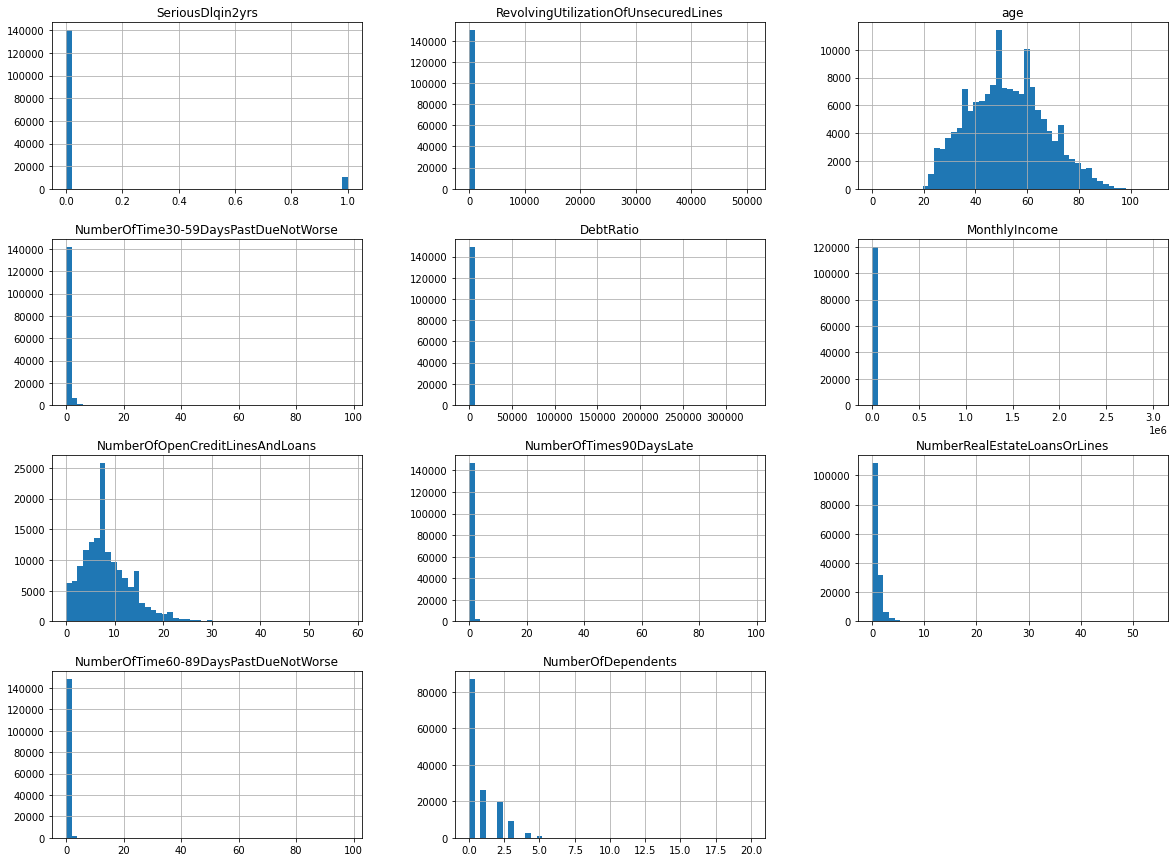

In [25]:
df_training.hist(bins=50, figsize=(20,15))

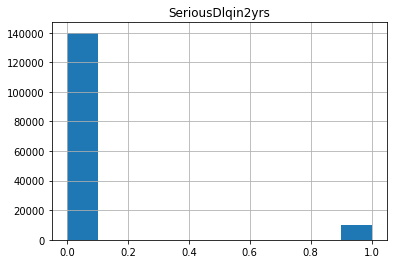

In [22]:
df_training['SeriousDlqin2yrs'].hist()
plt.title('SeriousDlqin2yrs')
plt.show()
## The issue of class imbalance is present

In [ ]:
df_training['SeriousDlqin2yrs'].mean()

In [21]:
df_training['MonthlyIncome'].value_counts()
## There are 1634 people with no income

5000.0     2757
4000.0     2106
6000.0     1934
3000.0     1758
0.0        1634
           ... 
3898.0        1
22956.0       1
11315.0       1
4552.0        1
6238.0        1
Name: MonthlyIncome, Length: 13594, dtype: int64

In [26]:
df_training.age.min()

0

In [27]:
df_training.age.value_counts()
## There is one observation in the dataset where age=0

49     3837
48     3806
50     3753
63     3719
47     3719
       ... 
102       3
109       2
105       1
107       1
0         1
Name: age, Length: 86, dtype: int64

#### Outlier detection

/Users/jorgohaezaerts/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DebtRatio'>

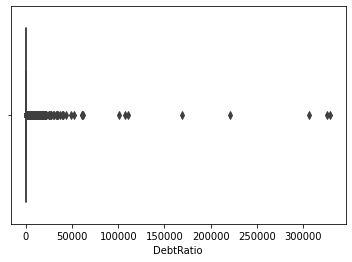

In [28]:
sns.boxplot(df_training['DebtRatio'])

/Users/jorgohaezaerts/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines'>

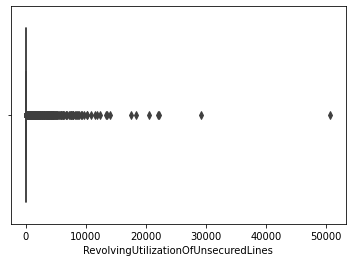

In [29]:
sns.boxplot(df_training['RevolvingUtilizationOfUnsecuredLines'])

/Users/jorgohaezaerts/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

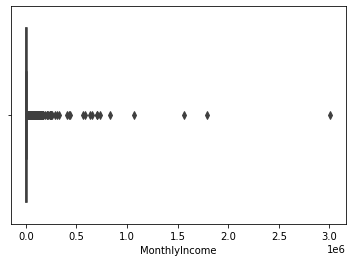

In [30]:
sns.boxplot(df_training['MonthlyIncome'])

In [ ]:
df_training.age.min()

In [ ]:
df_nonzeroage = df_training[df_training['age']!=0]

In [ ]:
df_nonzeroage['age'].min()

In [ ]:
df_training['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

In [ ]:
df_training['DebtRatio'].median()

In [ ]:
np.percentile(df_training['DebtRatio'], 90)

In [ ]:
df_highdebt = df_training[df_training['DebtRatio'] > 1267]

In [ ]:
df_highdebt['DebtRatio'].count()

In [ ]:
df_nonzeroincome = df_training[df_training['MonthlyIncome'] > 0]

In [ ]:
df_nonzeroincome.MonthlyIncome.min()

In [ ]:
np.percentile(df_training['MonthlyIncome'], 99)

In [ ]:
df_training['NumberOfOpenCreditLinesAndLoans'].hist()

In [ ]:
df_training['NumberOfOpenCreditLinesAndLoans'].describe()

In [ ]:
df_training['NumberRealEstateLoansOrLines'].hist(bins=50)

In [ ]:
df_training['NumberRealEstateLoansOrLines'].describe()

In [ ]:
np.percentile(df_training['NumberRealEstateLoansOrLines'], 99)

In [ ]:
df_training['NumberOfDependents'].hist(bins=20)

In [ ]:
df_training['NumberOfDependents'].describe()

In [ ]:
np.percentile(df_training['NumberOfDependents'], 99)

#### Looking for missing values

In [31]:
df_training.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [32]:
df_training.isna().sum()/df_training.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

#### Looking for correlations

In [35]:
corr_matrix = df_training.corr()
corr_matrix

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
NumberOfTime30-59DaysPastDueNotWorse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
NumberRealEstateLoansOrLines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
NumberOfTime60-89DaysPastDueNotWorse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922


In [36]:
corr_matrix["NumberOfTime30-59DaysPastDueNotWorse"].sort_values(ascending=False)

NumberOfTime30-59DaysPastDueNotWorse    1.000000
NumberOfTime60-89DaysPastDueNotWorse    0.987005
NumberOfTimes90DaysLate                 0.983603
SeriousDlqin2yrs                        0.125587
RevolvingUtilizationOfUnsecuredLines   -0.001314
NumberOfDependents                     -0.002680
DebtRatio                              -0.006542
MonthlyIncome                          -0.010217
NumberRealEstateLoansOrLines           -0.030565
NumberOfOpenCreditLinesAndLoans        -0.055312
age                                    -0.062995
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

In [8]:
df_training.drop('Unnamed: 0', axis=1, inplace=True)

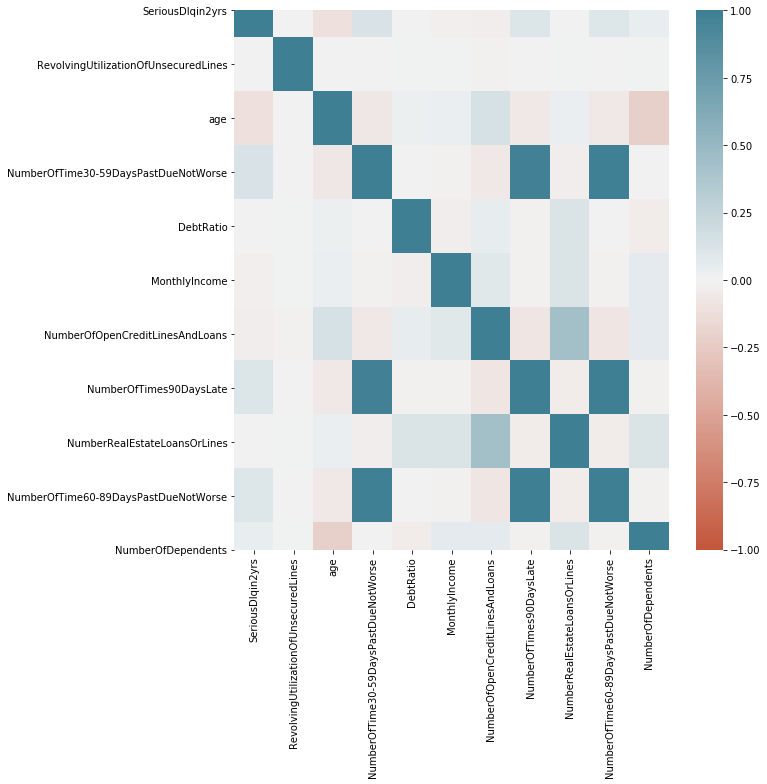

In [11]:
fig, ax = plt.subplots(figsize=(11, 11))
ax = sns.heatmap(df_training.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()